# Real and AI-Generated Synthetic Images
---

### 1. รหัส ชื่อ และหมู่ของนิสิตในกลุ่ม 
+ 6610450960 นันท์นภัส ภูริภัทรพันธุ์ หมู่ 200    
+ 6610450986 พชร พรมแพง หมู่ 200
+ 6610451061 รตนกมล แก้วมาตย์ หมู่ 200


### 2. ลิงค์ไปยังข้อมูลที่จะใช้ในระบบต้นแบบ 
https://www.kaggle.com/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images
    


### 3. แหล่งที่มา (คนที่เผยแพร่ได้หรือน่าจะได้ข้อมูลมาอย่างไร เช่น จากคน หรือ sensor)

##### CIFAKE Dataset:
+ คือ ชุดข้อมูลที่รวบรวมรูปภาพทั้งจาก CIFAR-10 dataset (REAL) และ Stable Diffusion (FAKE) เพื่อให้เป็นข้อมูลที่แบ่งแยกระหว่างภาพที่มนุษย์ถ่ายและภาพที่ AI-Generated ขึ้นมา
+ คลาส: แบ่งเป็น 2 กลุ่มคือ REAL และ FAKE เพื่อใช้ในการศึกษาและพัฒนาโมเดล ในด้านต่าง ๆ

##### CIFAR-10 Dataset (REAL images):
+ คือ ชุดข้อมูลที่รวบรวมรูปภาพที่มนุษย์ถ่าย (REAL) ถูกสร้างขึ้นโดย Alex Krizhevsky, Vinod Nair, และ Geoffrey Hinton โดยเลือกรูปภาพจาก 80 million tiny images 
+ ##### 80 million tiny images #####
    + คือ ชุดข้อมูลรูปภาพมีขนาด 32x32 พิกเซลและเป็นภาพสี เก็บรวบรวมจากการดาวน์โหลดรูปภาพด้วยการใช้ Web Search ซึ่ง Query คำนามจาก WordNet (Lexical Database หรือ database ที่รวบรวมคลังคำศัพท์) มากกว่า 53,464 คำ และคำนามเหล่านั้นมาเป็น labels ในการแบ่งข้อมูล แต่ในปี 2020 ผู้สร้างได้ประกาศยกเลิกการใช้งานและปิดตัวลง เนื่องจากพบว่ามีรูปภาพในหลาย label จำนวนมากที่มีเนื้อหาไม่เหมาะสม เช่น รูปภาพ racist และ offensive biased และอาจส่งผลให้ model ที่ train มีการ biased เกิดขึ้นตาม
    + แต่ชุดข้อมูล CIFAR-10 เป็นชุดข้อมูลที่นักวิจัยทั้งสามคน ได้มีการเลือกข้อมูล labels อิสระและไม่มีการ biased เพื่อใช้สำหรับ train model 

##### Stable Diffusion (FAKE images):
+ ใช้ CompVis SD เวอร์ชัน 1.4 ในการสร้างรูปภาพเทียบเท่า (synthetic images) เพื่อให้เหมือนกับรูปภาพจาก CIFAR-10 dataset ถูกสร้างขึ้นโดย Bird & Lotfi (2024) https://ieeexplore.ieee.org/abstract/document/10409290

ดังนั้น CIFAKE dataset เป็นชุดข้อมูลเพื่อคัดเลือกและรวบรวมรูปภาพจากแหล่งต่าง ๆ เพื่อใช้ในการศึกษาและพัฒนาโมเดล โดยมีการแยกแยะระหว่างภาพที่มนุษย์ถ่ายและภาพที่ AI-Generated ขึ้นมา



### 4. รูปแบบการจัดเก็บ (เช่น format และ โครงสร้าง)
Format: JPG files  
CIFAKE datasets มี 2 ชุดข้อมูล คือ REAL และ FAKE
+ โดยโครงสร้างข้างในทั้งคู่มี 10 classes แต่ละ class มีรูป 6000 รูป ทั้งหมด 60000 รูป 
+ โดยมีข้อมูลแบบ test 10000 รูป ซึ่งใน 10 class แต่ละ class ถูกสุ่มแบบ Simple Random Sampling จำนวน 1000 รูป
และแบบ train จำนวน 50000 รูป เป็นการสุ่มรูปภาพแบบ Random order ที่เหลือจาก CIFAR-10 
+ โดยข้อมูลแบ่งเป็น 5 training batches และ 1 test batches แต่ละ batch มี 10000 รูป โดย dataset มีทั้งในรูปแบบ Python, Matlab, และ binary โดยข้อมูลเก็บเป็นอาร์เรย์ของ pixel และ labels

โดยข้างใน batch จะเก็บข้อมูลเป็น dictionary โดยมี 2 elements คือ 
1.  data
2. labels

ข้อมูลแบ่งออกเป็น 10 labels name คือ 
1. airplane 
2. automobile 
3. bird 
4. cat 
5. deer 
6. dog 
7. frog 
8. horse
9. ship 
10. truck

แสดงให้เห็นว่าข้อมูลของเรา ไม่มี Class Imbalance และทุก labels เท่ากันหมด

In [ ]:
%pip install pillow

In [3]:
from IPython.display import display
from PIL import Image

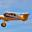

Image Format: JPEG
Image Mode: RGB
Image Size: (32, 32)


In [4]:
img = Image.open("test/FAKE/0.jpg")
display(img)
image_format = img.format
image_mode = img.mode
image_size = img.size
print(f"Image Format: {image_format}")
print(f"Image Mode: {image_mode}")
print(f"Image Size: {image_size}")


In [1]:
import os

# Directory containing the files
directory = './train/FAKE'

# Initialize counters for specific labels
counters = {str(i): 0 for i in range(1, 11)}

# Track filenames to check for overlaps
filenames = {str(i): [] for i in range(1, 11)}

# Loop through the files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.jpg'):
        # Check if the file has a label in parentheses
        if '(' in filename and ')' in filename:
            label = filename.split('(')[-1].split(')')[0]
        else:
            label = '1'
        
        # Update the counter if the label is between 1 and 10
        if label in counters:
            counters[label] += 1
            filenames[label].append(filename)

# Print the counts and some sample filenames for each label
for label, count in counters.items():
    print(f'Files ending with ({label}).jpg: {count}')
    print(f'Sample filenames for ({label}): {filenames[label][:5]}')  # Print first 5 filenames for each label

Files ending with (1).jpg: 5000
Sample filenames for (1): ['1000.jpg', '1001.jpg', '1002.jpg', '1003.jpg', '1004.jpg']
Files ending with (2).jpg: 5000
Sample filenames for (2): ['1000 (2).jpg', '1001 (2).jpg', '1002 (2).jpg', '1003 (2).jpg', '1004 (2).jpg']
Files ending with (3).jpg: 5000
Sample filenames for (3): ['1000 (3).jpg', '1001 (3).jpg', '1002 (3).jpg', '1003 (3).jpg', '1004 (3).jpg']
Files ending with (4).jpg: 5000
Sample filenames for (4): ['1000 (4).jpg', '1001 (4).jpg', '1002 (4).jpg', '1003 (4).jpg', '1004 (4).jpg']
Files ending with (5).jpg: 5000
Sample filenames for (5): ['1000 (5).jpg', '1001 (5).jpg', '1002 (5).jpg', '1003 (5).jpg', '1004 (5).jpg']
Files ending with (6).jpg: 5000
Sample filenames for (6): ['1000 (6).jpg', '1001 (6).jpg', '1002 (6).jpg', '1003 (6).jpg', '1004 (6).jpg']
Files ending with (7).jpg: 5000
Sample filenames for (7): ['1000 (7).jpg', '1001 (7).jpg', '1002 (7).jpg', '1003 (7).jpg', '1004 (7).jpg']
Files ending with (8).jpg: 5000
Sample filename

In [ ]:
%pip install ipyplot

In [6]:
import ipyplot

In [7]:
labels = [
    'airplane', 
    'automobile',
    'bird', 
    'cat' ,
    'deer' ,
    'dog',
    'frog', 
    'horse',
    'ship',
    'truck'
]

In [18]:
train_REAL_images = [
"train/REAL/0000.jpg",
"train/REAL/0000 (2).jpg",
"train/REAL/0000 (3).jpg",
"train/REAL/0000 (4).jpg",
"train/REAL/0000 (5).jpg",
"train/REAL/0000 (6).jpg",
"train/REAL/0000 (7).jpg",
"train/REAL/0000 (8).jpg",
"train/REAL/0000 (9).jpg",
"train/REAL/0000 (10).jpg"
]
ipyplot.plot_class_representations(train_REAL_images, labels, img_width=100)

In [19]:
train_FAKE_images = [
"train/FAKE/1000.jpg",
"train/FAKE/1000 (2).jpg",
"train/FAKE/1000 (3).jpg",
"train/FAKE/1000 (4).jpg",
"train/FAKE/1000 (5).jpg",
"train/FAKE/1000 (6).jpg",
"train/FAKE/1000 (7).jpg",
"train/FAKE/1000 (8).jpg",
"train/FAKE/1000 (9).jpg",
"train/FAKE/1000 (10).jpg"
]
ipyplot.plot_class_representations(train_FAKE_images, labels, img_width=100)

In [9]:
test_REAL_images = [
"test/REAL/0000.jpg",
"test/REAL/0000 (2).jpg",
"test/REAL/0000 (3).jpg",
"test/REAL/0000 (4).jpg",
"test/REAL/0000 (5).jpg",
"test/REAL/0000 (6).jpg",
"test/REAL/0000 (7).jpg",
"test/REAL/0000 (8).jpg",
"test/REAL/0000 (9).jpg",
"test/REAL/0000 (10).jpg"
]
ipyplot.plot_class_representations(test_REAL_images, labels, img_width=100)

In [8]:
test_FAKE_images = [
"test/FAKE/0.jpg",
"test/FAKE/0 (2).jpg",
"test/FAKE/0 (3).jpg",
"test/FAKE/0 (4).jpg",
"test/FAKE/0 (5).jpg",
"test/FAKE/0 (6).jpg",
"test/FAKE/0 (7).jpg",
"test/FAKE/0 (8).jpg",
"test/FAKE/0 (9).jpg",
"test/FAKE/0 (10).jpg"
]
ipyplot.plot_class_representations(test_FAKE_images, labels, img_width=100)

### 5.  จำนวนข้อมูล ("ตัวอย่าง"/"sample"/"example"/"instance"/"data point") ในชุดข้อมูล

+ Training images: 100000 images (FAKE 50000, REAL 50000)

+ Test images: 20000 images (FAKE 10000, REAL 10000)



In [14]:
import os

train = os.listdir("D:\Mook\\262_ML\HW\\train") 
print("\\train contains {len_folder} file(s).".format(len_folder=len(train)))

train_REAL = os.listdir("D:\Mook\\262_ML\HW\\train\REAL") 
print("  \\train\REAL contains {len_folder} file(s).".format(len_folder=len(train_REAL)))

train_FAKE = os.listdir("D:\Mook\\262_ML\HW\\train\FAKE") 
print("  \\train\FAKE contains {len_folder} file(s).".format(len_folder=len(train_FAKE)))

test = os.listdir("D:\Mook\\262_ML\HW\\test") 
print("\\test contains {len_folder} file(s).".format(len_folder=len(test)))

test_FAKE = os.listdir("D:\Mook\\262_ML\HW\\test\FAKE")
print("  \\test\FAKE contains {len_folder} file(s).".format(len_folder=len(test_FAKE)))

test_REAL = os.listdir("D:\Mook\\262_ML\HW\\test\REAL") 
print("  \\test\REAL contains {len_folder} file(s).".format(len_folder=len(test_REAL)))


\train contains 2 file(s).
  \train\REAL contains 50000 file(s).
  \train\FAKE contains 50000 file(s).
\test contains 2 file(s).
  \test\FAKE contains 10000 file(s).
  \test\REAL contains 10000 file(s).



### 6. สิ่งที่ต้องการทำนาย ("คำตอบ"/"เฉลย"/"class"/"label"/"target") คืออะไร 
Binary Classification ว่าเป็นรูปภาพ AI-generated หรือ ภาพจากมนุษย์




### 7. สิ่งที่ใช้ในการทำนาย ("คุณลักษณะ"/"feature") คืออะไร (เช่น ค่าอะไรบ้าง ข้อความอะไร รูปภาพอะไร หรืออื่น ๆ)
+ รูปภาพที่ AI-generated
+ รูปภาพจริงที่ถูกถ่ายมนุษย์
    


### 8. ต้องมีการเตรียม/ประมวลผลข้อมูลส่วนไหนก่อนหรือไม่ เพราะอะไร อย่างไร
+ ต้องมีการทำ image processing เนื่องจาก ข้อมูลที่นำเข้าและข้อมูลที่ใช้ประมวลผลเป็น image 
+ Transfer Learning นำโมเดลของคนอื่นมาปรับใช้กับข้อมูลตัวอย่างของเรา เพื่อลดเวลาในการพัฒนาโมเดลของเราและมีประสิทธิภาพเพิ่มมากขึ้น และสามารถตรวจสอบความแม่นยำของ Algorithm ที่เราใช้ในโมเดลแรก และสามารถปรับ Algorithm ให้ดีขึ้นได้ในโมเดลตัวถัดไป    


### 9. มีข้อมูลที่ไม่น่าจะได้ใช้ในระบบต้นแบบของเราอยู่ด้วยหรือไม่ เพราะอะไร
ไม่มี เนื่องจากระบบต้นแบบต้องใช้ข้อมูลเป็นรูปภาพในการประมวลผลข้อมูล และข้อมูลใน datasets สามารถใช้ข้อมูลได้ทั้งหมด
    


### 10. ข้อมูลควรถูกนำไปจัดเก็บในรูปแบบอื่นหรือไม่ เพราะอะไร อย่างไร
ไม่มี เนื่องจากข้อมูลไม่จำเป็นต้องจัดเก็บในรูปแบบข้อมูลที่ซับซ้อน
    


### 11. ประเด็นอื่น ๆ ที่เกี่ยวข้องกับข้อมูลของตัวเอง
datasets ที่ใช้เป็นรูปภาพประเภทรูปถ่าย โดยไม่มีข้อมูลประเภทรูปวาด



### 12. การมีส่วนร่วมของสมาชิกแต่ละคนในกลุ่ม 
+ 6610450960 นันท์นภัส ภูริภัทรพันธุ์ (เลือก datasets, เรียบเรียงข้อมูล)
+ 6610450986 พชร พรมแพง (เลือก datasets, สรุปและวิเคราะห์ข้อมูล)
+ 6610451061 รตนกมล แก้วมาตย์ (เลือก datasets, สรุปและวิเคราะห์ข้อมูล)



### 13. การเปิดเผยการใช้เครื่องมือปัญญาประดิษฐ์
+ ChatGPT
+ Gemini
<!-- ? . ระบุว่าใชข้ AI ทำอะไรบ้าง โดยละเอียด ไม่ควรใช้ AI ในการตรวจสอบข้อมูล -->
